In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
sd = pd.read_csv('School_Data.csv')
sd.head()

,City,Primary,upper,second
0,AHMEDABAD,153.64,234.74,543.33
1,AMRELI,77.76,162.32,711.27
2,ANAND,55.08,110.18,667.27
3,ARAVALLI,32.32,78.78,498.77
4,BANAS_KANTHA,60.67,292.89,696.83


In [6]:
total = []
temp = 0 

for i  in range(len(sd)):
    f1 = sd['Primary'][i] + sd['upper'][i] + sd['second'][i]
    total.append(f1)

In [7]:
sd['Overall'] = total

In [8]:
sd.head()

,City,Primary,upper,second,Overall
0,AHMEDABAD,153.64,234.74,543.33,931.71
1,AMRELI,77.76,162.32,711.27,951.35
2,ANAND,55.08,110.18,667.27,832.53
3,ARAVALLI,32.32,78.78,498.77,609.87
4,BANAS_KANTHA,60.67,292.89,696.83,1050.39


In [12]:
sd.describe()

,Primary,upper,second,Overall
count,33.000000,33.000000,33.000000,33.000000
mean,76.703333,183.019394,651.667576,911.390303
std,49.473985,87.634330,120.949437,204.729864
min,22.740000,41.540000,365.220000,499.840000
25%,47.280000,138.490000,591.730000,780.390000
50%,62.360000,162.320000,667.270000,928.810000
75%,83.560000,241.690000,725.360000,1031.220000
max,262.690000,478.560000,890.100000,1376.410000


In [10]:
x = sd[['Overall']]
y = sd[['Primary', 'upper', 'second']]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y , random_state=911 , train_size=0.8 , test_size=0.2 )

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(x_train, y_train)

LinearRegression()

In [47]:
lm.coef_

array([[0.0983714 ],
       [0.32353855],
       [0.57809006]])

In [48]:
lm.intercept_

array([ -17.33517512, -112.87031819,  130.20549332])

In [49]:
prediction = lm.predict(x_test)

In [50]:
prediction

array([[ 56.93424541, 131.39805046, 566.65770414],
       [118.06419853, 332.4513752 , 925.89442627],
       [ 81.00277495, 210.55822709, 708.09899795],
       [ 35.74209549,  61.69814098, 442.11976353],
       [ 84.10737622, 220.76910368, 726.3435201 ],
       [ 64.56196348, 156.4852295 , 611.48280702],
       [ 59.43287887, 139.61592959, 581.34119154]])

C:\Users\malan\AppData\Local\Temp\ipykernel_28156\253873049.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((prediction - y_test))


<AxesSubplot: ylabel='Density'>

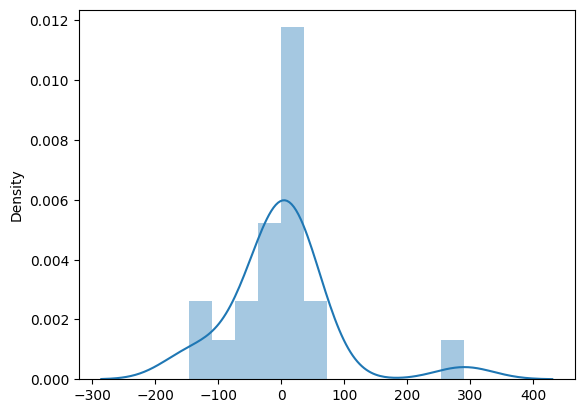

In [51]:
sns.distplot((prediction - y_test))

In [57]:
obj = float(input("Enter The Percentage : "))
l1 = [obj]

pre = lm.predict([l1]).tolist()
if pre[0][0] < 0 :
    pre[0][0] = 0
if  pre[0][1] < 0 :
    pre[0][1] = 0
if pre[0][2] < 0 :
    pre[0][2] = 0
print(f"Pre-primary : {pre[0][1]} \nUpper-primary : {pre[0][1]} \nSecondary : {pre[0][2]}")

Enter The Percentage :  453.2


Pre-primary : 33.75735193950746 
Upper-primary : 33.75735193950746 
Secondary : 392.19590635916603


C:\Users\malan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
